In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [3]:
image_path = rf'C:\Users\barki\Downloads\test_image.jpg'

In [4]:
image = cv2.imread(image_path)

In [5]:
# Display given image
def show_image(input_image, image_name = 'image', color_map = 'gray'):
    cv2.imshow(image_name, input_image)
    cv2.waitKey(0)
    cv2.destroyWindow(image_name)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB), cmap=color_map)
    print(f"{image_name}: \n{input_image}\nimage shape: {input_image.shape}")

image: 
[[[116  91  75]
  [194 174 134]
  [194 174 134]
  ...
  [248 238 215]
  [248 238 215]
  [248 238 215]]

 [[157 133 106]
  [194 174 134]
  [194 174 134]
  ...
  [247 238 215]
  [247 238 215]
  [247 238 215]]

 [[185 163 127]
  [194 174 134]
  [194 174 134]
  ...
  [247 238 215]
  [247 238 215]
  [247 238 215]]

 ...

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 73  74  82]
  [ 73  74  82]
  [ 73  74  82]]

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 72  73  81]
  [ 72  73  81]
  [ 72  73  81]]

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 72  73  81]
  [ 72  73  81]
  [ 72  73  81]]]
image shape: (704, 1279, 3)


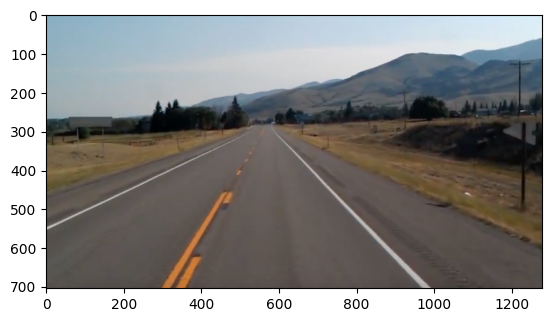

In [6]:
show_image(image)

gray_image: 
[[ 89 164 164 ... 232 232 232]
 [128 164 164 ... 232 232 232]
 [155 164 164 ... 232 232 232]
 ...
 [ 81  81  81 ...  76  76  76]
 [ 81  81  81 ...  75  75  75]
 [ 81  81  81 ...  75  75  75]]
image shape: (704, 1279)


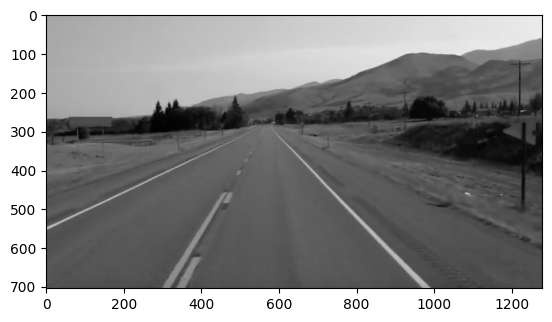

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "gray_image")


In [8]:
# Apply gaussian filter on given image, display and return the output image
def apply_gaussian_fitler(input_image, kernel_size = 5, deviation = 0):
    blurred_image = cv2.GaussianBlur(input_image, (kernel_size, kernel_size), deviation)
    show_image(blurred_image, "blurred_image")
    return blurred_image


blurred_image: 
[[146 152 161 ... 232 232 232]
 [150 155 162 ... 232 232 232]
 [158 160 163 ... 232 232 232]
 ...
 [ 81  81  81 ...  76  77  77]
 [ 81  81  81 ...  75  75  76]
 [ 81  81  81 ...  75  75  75]]
image shape: (704, 1279)


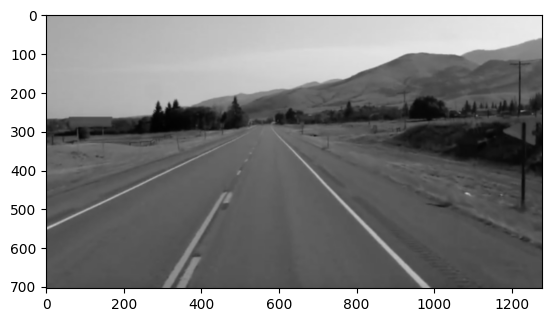

In [9]:
blurred_image = apply_gaussian_fitler(gray_image)

In [10]:
# Apply 'Canny' technique on the given image to detect it's edges
def apply_canny_edge_detection(input_image, threshold_1 = 50, threshold_2 = 150):
    canny_image = cv2.Canny(input_image, threshold_1, threshold_2)
    show_image(canny_image, "canny_image")
    return canny_image

canny_image: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
image shape: (704, 1279)


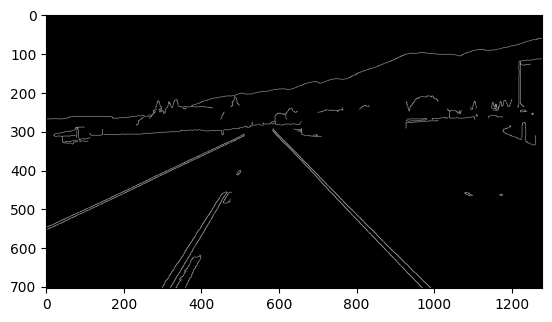

In [11]:
# Apply canny function on the blurred image to detect the edges of the image
canny_image = apply_canny_edge_detection(blurred_image)

masked image: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
image shape: (704, 1279)


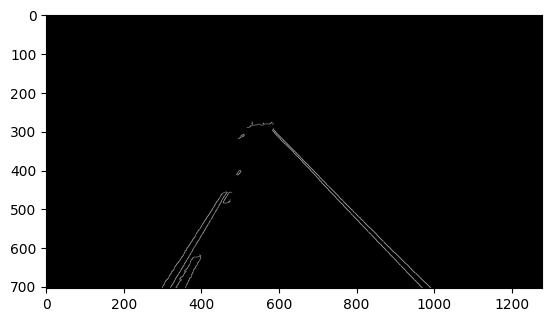

In [23]:
def create_image_mask(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
        ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    show_image(masked_image, "masked image")
    return masked_image

masked_image = create_image_mask(canny_image)